# k-Fold Cross Validation

### Data preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # for training and testing split
from sklearn.preprocessing import StandardScaler # for Feature scaling
from sklearn.svm import SVC # for classifier
from sklearn.metrics import confusion_matrix # for making confusion matrix
from matplotlib.colors import ListedColormap # for visualisation
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [4]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [5]:
X_train[0:10]

array([[  2.70000000e+01,   5.70000000e+04],
       [  4.60000000e+01,   2.80000000e+04],
       [  3.90000000e+01,   1.34000000e+05],
       [  4.40000000e+01,   3.90000000e+04],
       [  5.70000000e+01,   2.60000000e+04],
       [  3.20000000e+01,   1.20000000e+05],
       [  4.10000000e+01,   5.20000000e+04],
       [  4.80000000e+01,   7.40000000e+04],
       [  2.60000000e+01,   8.60000000e+04],
       [  2.20000000e+01,   8.10000000e+04]])

In [6]:
X_test[0:10]

array([[  4.60000000e+01,   2.20000000e+04],
       [  5.90000000e+01,   8.80000000e+04],
       [  2.80000000e+01,   4.40000000e+04],
       [  4.80000000e+01,   9.60000000e+04],
       [  2.90000000e+01,   2.80000000e+04],
       [  3.00000000e+01,   6.20000000e+04],
       [  4.70000000e+01,   1.07000000e+05],
       [  2.90000000e+01,   8.30000000e+04],
       [  4.00000000e+01,   7.50000000e+04],
       [  4.20000000e+01,   6.50000000e+04]])

In [7]:
y_train[0:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [8]:
y_test[0:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [9]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train[0:10]

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264]])

In [11]:
X_test[0:10]

array([[ 0.79753468, -1.40447546],
       [ 2.07309956,  0.51542886],
       [-0.96863208, -0.76450736],
       [ 0.99377543,  0.74814454],
       [-0.87051171, -1.22993871],
       [-0.77239133, -0.24089709],
       [ 0.89565505,  1.06812859],
       [-0.87051171,  0.36998156],
       [ 0.20881242,  0.13726589],
       [ 0.40505317, -0.15362871]])

### Fitting Kernel SVM classifier to the Training set

In [12]:
classifier = SVC(kernel = 'rbf', random_state = 42) # Kernel SVM is non-linear classifier
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
y_pred[0:10]

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [15]:
y_test[0:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

### Applying k-Fold Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.
    
    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer callable obje

In [18]:
accuracies = cross_val_score(estimator = classifier, 
                             X = X_train,
                             y = y_train,
                             cv = 10)

In [19]:
accuracies # 10 test set accuracies

array([ 0.96969697,  0.87878788,  0.93939394,  0.96969697,  0.90909091,
        0.87096774,  0.87096774,  0.87096774,  0.83870968,  0.93548387])

In [20]:
np.mean(accuracies) # mean of accuracies

0.90537634408602141

In [21]:
np.std(accuracies) # startdard deviation of accuracies

0.043652022122493701

***

This signifies that we are in Low Bias Low Variance category in **Bias-Variance TradeOff**.

***

### Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  5],
       [ 1, 27]])

* * *

**classifier made 47 + 27 = 74 correct prediction and 5 + 1 = 6 incoreect predictions.**

* * *

### Visualising the Training set results

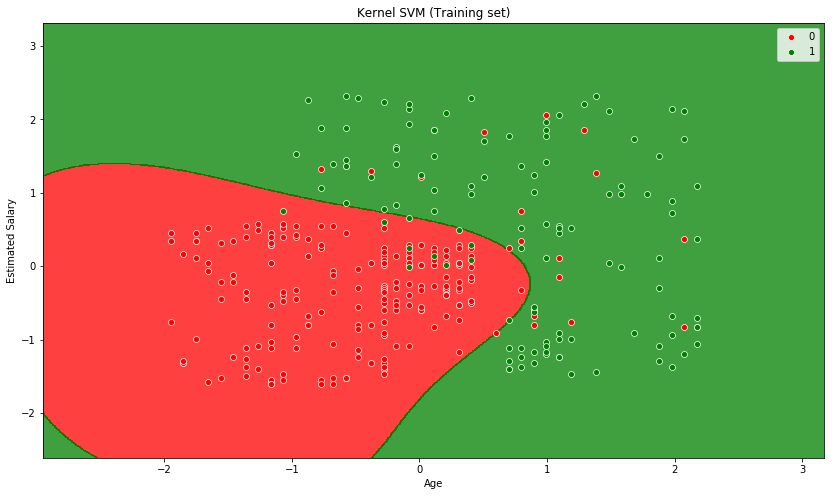

In [23]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

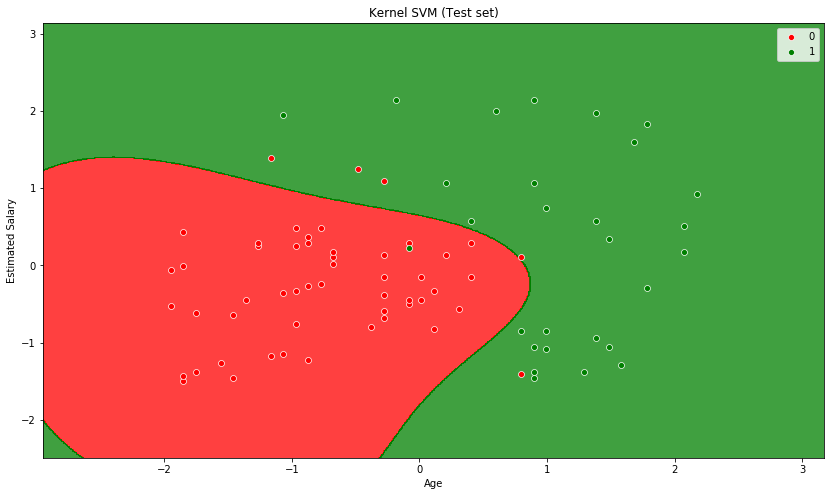

In [24]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

***

**Looks like it is much better the Linear kernel.**

***